<a href="https://colab.research.google.com/github/IOlivaresPalma/Multimedia-Trabajos/blob/main/Actividad_1_OlivaresIvan_19761543.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Iván Olivares Palma</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub.

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub.

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [ ]:
# Agrega tu usuario

# Agrega el enlace al repositorio para tus trabajo

[Usuario: IOlivaresPalma](https://github.com/IOlivaresPalma/Multimedia-Trabajos)

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2}
$$

$$
f(z) =  ysin(x)
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

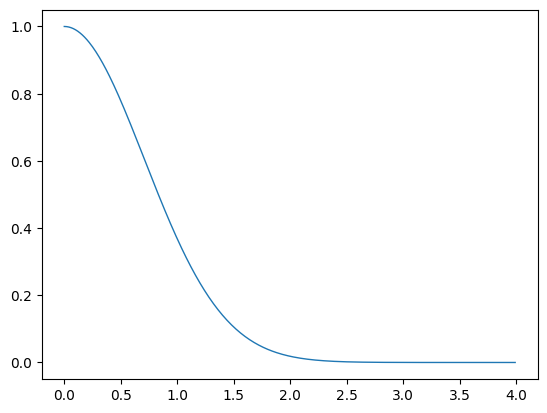

In [3]:
# f(x) = e^(-x^2)

import numpy as np
import matplotlib.pyplot as plt

pasos = 0.01
x   = np.arange(0,4,pasos)
f_x = np.exp(-x**2)
plt.plot(x,f_x,linewidth=1)



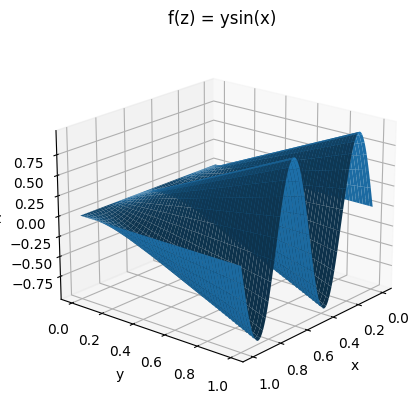

In [4]:
# f(z) = ysin(x)
from mpl_toolkits import mplot3d

pasos = 0.001
freq = 2 # frecuencia = 1Hz

x = np.arange(0,1,pasos)
y = np.arange(0,1,pasos)

X,Y = np.meshgrid(x,y)


z = Y*np.sin(2*np.pi*freq*X)

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot_surface(X,Y,z,linewidth=0)
ax.set_title('f(z) = ysin(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20,40)    # Se cambia para visualizar de mejor forma la función

plt.show()


## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


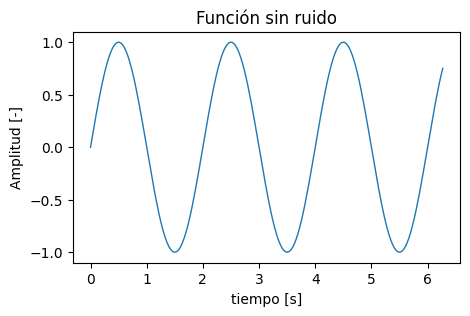

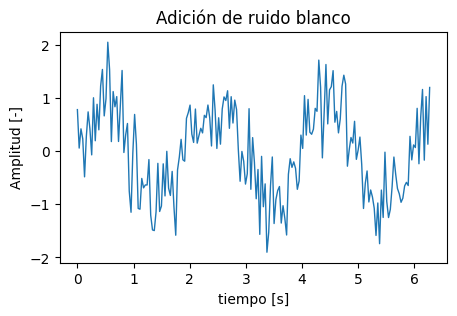

In [10]:
#Generamos el ruido gaussiano

import numpy as np
import matplotlib.pyplot as plt

pasos = 1/(10*np.pi)
x     = np.arange(0,2*np.pi,pasos)

#parametros de la función
freq = 2 # frecuencia: 2 Hz
A = 1    # amplitud

f_x = A*np.sin(x*freq*np.pi/2)

plt.figure(figsize=(5,3))
plt.title("Función sin ruido")
plt.plot(x,f_x,linewidth=1)
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud [-]")

muestras = len(x) # se extrae el tamaño de X para no tener errores de tamaño con los arreglos
dev = 0.5         # Desviacion estandar
white_noise = np.random.normal(0,dev,muestras) # dev > 0.5 --> no se visualizan bien los datos
f_x_noise = f_x +white_noise

plt.figure(figsize=(5,3))
plt.title("Adición de ruido blanco")
plt.plot(x,f_x_noise,linewidth=1)
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud [-]")
plt.show()


Se puede observar que al aumentar la desviación estandar, la señal más dificil de identificar.


### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

Mientras que el ruido gaussiano es uniforme para todas las frecuencias y tiene la misma energía en todo el espectro, la energía del ruido rosa es igual para cada octavo. Se diferencia del ruido blanco en que su potencia disminuye a medida que la frecuencia aumenta, teniendo un comportamiento inversamente proporcional

<ipython-input-11-5a350318b592>:37: RuntimeWarning: divide by zero encountered in log10
  Mag_dB_pink  = 20*np.log10(magnitud_pink)


Text(0, 0.5, 'Magnitud [dB]')

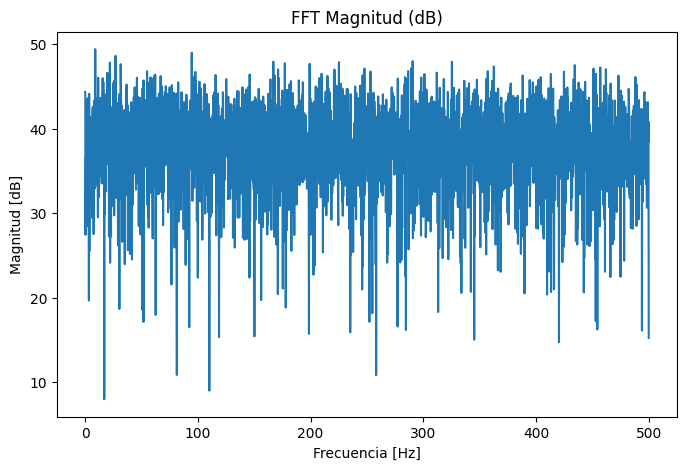

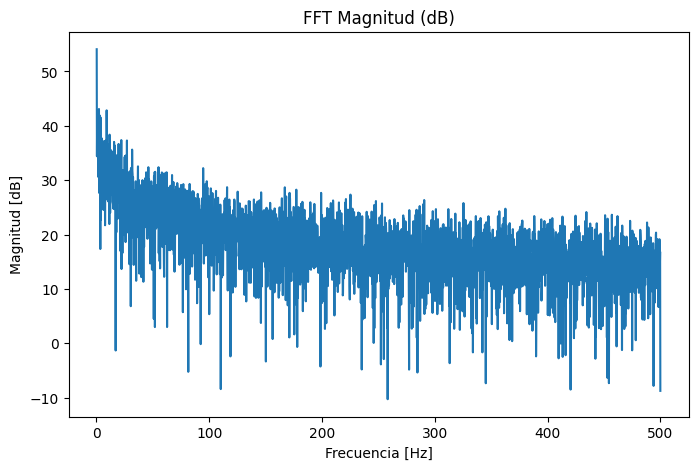

In [11]:
import numpy as np

sample_rate = 1000
duration = 10  # segundos
n_samples = sample_rate * duration


# Se genera el ruido blanco
white_noise = np.random.randn(n_samples)

# Se calcula la FFT para el ruido blanco
white_fft = np.fft.rfft(white_noise)

# Se extraen las frecuencias
freqs = np.fft.rfftfreq(n_samples, d=1/sample_rate)

# Se genera una escala para a continuación extraer el ruido rosa
scale = np.zeros_like(freqs)
scale[1:] = 1 / np.sqrt(freqs[1:])  # Se excluye componente DC

# Se aplica el escalamiento al ruido blanco
pink_fft = white_fft * scale


# calcular magnitud de ruido blanco y rosa
white_real = np.real(white_fft)
white_imag = np.imag(white_fft)

pink_real = np.real(pink_fft)
pink_imag = np.imag(pink_fft)

magnitud_white = np.sqrt(white_real**2 + white_imag**2)
magnitud_pink  = np.sqrt(pink_real**2 + pink_imag**2)

# magnitud en dB
Mag_dB_white = 20*np.log10(magnitud_white)
Mag_dB_pink  = 20*np.log10(magnitud_pink)

# extraer eje de frecuencias

freq_white = np.fft.fftfreq(len(magnitud_white), 1/sample_rate)
freq_pink  = np.fft.fftfreq(len(magnitud_pink), 1/sample_rate)

#Se extraen solamente las frecuencias positivas
freq_positivas_white = freq_white >= 0
freq_positivas_pink  = freq_pink >= 0

freq_white = freq_white[freq_positivas_white]
freq_pink  = freq_pink[freq_positivas_pink]

Mag_dB_white = Mag_dB_white[freq_positivas_white]
Mag_dB_pink  = Mag_dB_pink[freq_positivas_pink]

# Plot the magnitude in dB
plt.figure(figsize=(8, 5))
plt.plot(freq_white, Mag_dB_white)
plt.title('FFT Magnitud (dB)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')

# Plot the magnitude in dB
plt.figure(figsize=(8, 5))
plt.plot(freq_pink, Mag_dB_pink)
plt.title('FFT Magnitud (dB)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')


Se puede observar que el ruido blanco es casi uniforme para todas las frecuencias, mientras que la potencia del ruido rosa disminuye, esto último puede ayudar para aplicaciones en audio ya que la **energía acumulada es igual para cada octavo**.

## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a

[Generación de ruido rosa][https://ades-blog.tiempo.llc/understanding-pink-noise-generation-in-python/](https://ades-blog.tiempo.llc/understanding-pink-noise-generation-in-python/)

[Transformada discreta de fourier][https://numpy.org/doc/stable/reference/routines.fft.html](https://numpy.org/doc/stable/reference/routines.fft.html)

[3D plotting python][https://likegeeks.com/3d-plotting-in-python/](https://likegeeks.com/3d-plotting-in-python/)